###Setting-Up
Importing Library

In [1]:
#import import_ipynb
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
import urllib.request
import zipfile
from data_preprocessing import IndonesianFoodDataset

### Pre-Processing
importing dataset, normalize the layer and setting-up image augmentation

In [2]:
url = "https://nopladi-index.vercel.app/api/raw/?path=/dataset/indonesian_foods_v3.zip"
filename = "../dataset/indonesian_foods.zip"
os.makedirs('../dataset')
urllib.request.urlretrieve(url, filename)

('../dataset/indonesian_foods.zip', <http.client.HTTPMessage at 0x17e161f40>)

In [3]:
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('../dataset/')

In [4]:
data = IndonesianFoodDataset('../dataset/indonesian_foods/', split_size=(0.8,0.1,0.1))

Directory exists: ../dataset/
ayam_bakar: 919
bakso: 737
bebek_goreng: 472
burger: 728
gado_gado: 764
gudeg: 751
ikan_bakar: 649
martabak_manis: 569
martabak_telor: 598
nasi_goreng: 606
omelette: 727
pempek: 575
rendang: 782
sate: 1129
sayur_asem: 597
semur_jengkol: 550


In [7]:
train_set, val_set, test_set = data.load_data(
    target_size=(224,224),
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

Copying files: 11153 files [00:08, 1306.15 files/s]


Found 8812 images belonging to 16 classes.
Found 1095 images belonging to 16 classes.
Found 1120 images belonging to 16 classes.


In [9]:
pre_trained_model = DenseNet121(include_top = False,
                                input_shape=(224, 224, 3),
                                weights = 'imagenet',
                                pooling='max')

for layer in pre_trained_model.layers:
  layer.trainable = False

Note: Only use one architecture below! Don't run all of them. Best architecture:
- [ ] Architecture 1 (train: 0.85 ; val: 0.72)
- [ ] Architecture 2 (train: 0.87 ; val: 0.77)
- [x] Architecture 3 (train: 0.77 ; val: 0.76)

#####Architecture 1 --26/11/2023
**overfitting**
- loss: 0.4332 - accuracy: 0.8525 - val_loss: 1.0992 - val_accuracy: 0.7274
- loss: 1.8657 - accuracy: 0.3614 - val_loss: 1.4383 - val_accuracy: 0.5425

In [ ]:
#current version = 3.0
num_class = 12

pre_output = pre_trained_model.layers[-2].output
x = tf.keras.layers.Flatten()(pre_output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(num_class, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

#####Architecture 2 --2023/11/26
**overfitting**
- loss: 0.1564 - accuracy: 0.9468 - val_loss: 1.2287 - val_accuracy: 0.7391
- loss: 0.3616 - accuracy: 0.8798 - val_loss: 0.7501 - val_accuracy: 0.7773
- loss: 0.3936 - accuracy: 0.8721 - val_loss: 0.8434 - val_accuracy: 0.7652

In [ ]:
#current version = 4.0
num_class = 12

pre_output = pre_trained_model.layers[-2].output
x = tf.keras.layers.Flatten()(pre_output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(num_class, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

#####Architecture 3 --
**val_accuracy higher than train, but rather stable**
- loss: 0.6797 - accuracy: 0.7734 - val_loss: 0.7517 - val_accuracy: 0.7620
- loss: 0.5305 - accuracy: 0.8289 - val_loss: 0.8046 - val_accuracy: 0.7445
- loss: 0.3745 - accuracy: 0.8820 - val_loss: 0.7929 - val_accuracy: 0.7715

In [ ]:
#current version = 4.0
num_class = 12

pre_output = pre_trained_model.layers[-2].output
x = tf.keras.layers.Flatten()(pre_output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(num_class, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

#reference
"""
model.add(OldModel)
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(256, activation='relu',
kernel_initializer=kernel_init))
model.add(K.layers.Dropout(0.7))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(128, activation='relu',
kernel_initializer=kernel_init))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(64, activation='relu',
kernel_initializer=kernel_init))
model.add(K.layers.Dropout(0.3))
model.add(K.layers.Dense(10, activation='softmax',
kernel_initializer=kernel_init))
"""

"\nmodel.add(OldModel)\nmodel.add(K.layers.Flatten())\nmodel.add(K.layers.BatchNormalization())\nmodel.add(K.layers.Dense(256, activation='relu',\nkernel_initializer=kernel_init))\nmodel.add(K.layers.Dropout(0.7))\nmodel.add(K.layers.BatchNormalization())\nmodel.add(K.layers.Dense(128, activation='relu',\nkernel_initializer=kernel_init))\nmodel.add(K.layers.Dropout(0.5))\nmodel.add(K.layers.BatchNormalization())\nmodel.add(K.layers.Dense(64, activation='relu',\nkernel_initializer=kernel_init))\nmodel.add(K.layers.Dropout(0.3))\nmodel.add(K.layers.Dense(10, activation='softmax',\nkernel_initializer=kernel_init))\n"

#####Achitecture 4
The Simplify
- loss: 19.1716 - accuracy: 0.6613 - val_loss: 16.0050 - val_accuracy: 0.6973

In [ ]:
num_class = 12

pre_output = pre_trained_model.layers[-2].output
x = tf.keras.layers.Flatten()(pre_output)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(num_class, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

#####Model Compile

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [ ]:
model.compile(loss= 'categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(1e-3),
              metrics = ['accuracy'])

In [ ]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              optimizer= tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model",
                                                save_best_only = True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 1)

In [ ]:
history = model.fit(train_set,
                    validation_data = val_set,
                    epochs = 5,
                    callbacks = [stop_early, checkpoint])

Epoch 1/5
278/278 [==============================] - 103s 343ms/step - loss: 1.4032 - accuracy: 0.5521 - val_loss: 1.0557 - val_accuracy: 0.6635
Epoch 2/5
278/278 [==============================] - 104s 371ms/step - loss: 0.5499 - accuracy: 0.8316 - val_loss: 0.8552 - val_accuracy: 0.7274
Epoch 3/5
278/278 [==============================] - 92s 327ms/step - loss: 0.2504 - accuracy: 0.9301 - val_loss: 0.8078 - val_accuracy: 0.7607
Epoch 4/5
278/278 [==============================] - 95s 339ms/step - loss: 0.1171 - accuracy: 0.9744 - val_loss: 0.7939 - val_accuracy: 0.7688
Epoch 5/5
278/278 [==============================] - 55s 194ms/step - loss: 0.0706 - accuracy: 0.9873 - val_loss: 0.8209 - val_accuracy: 0.7737


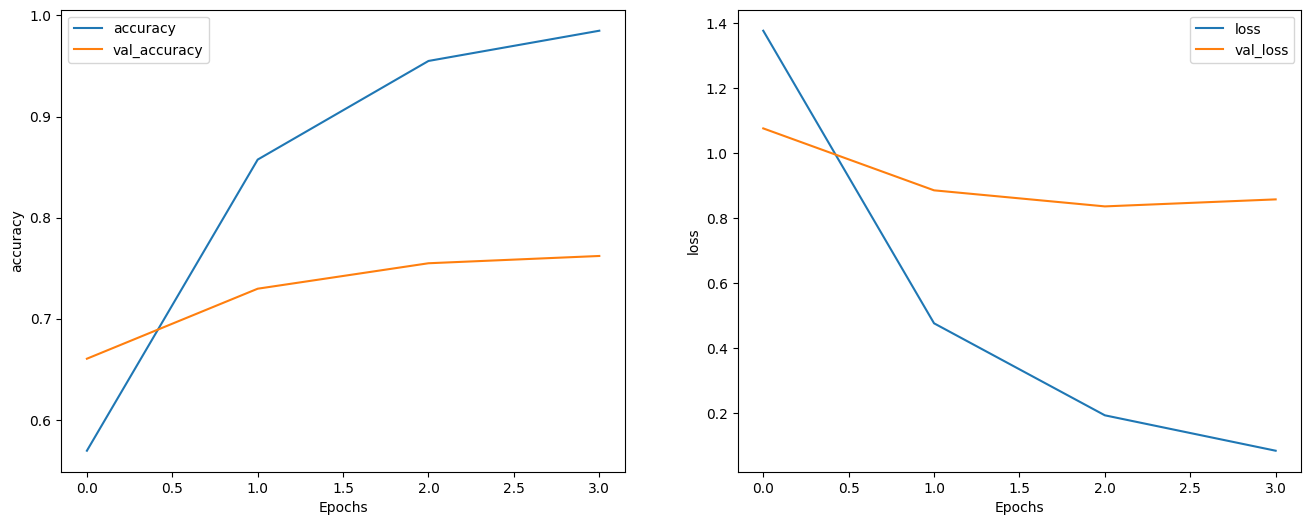

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_' + metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_' + metric])

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [ ]:
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_4[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']   

In [ ]:
loaded_model = tf.keras.models.load_model('best_model')
new_history = loaded_model.fit(train_set,
                               validation_data = val_set,
                               epochs = 5,
                               callbacks = [stop_early, checkpoint])

Epoch 1/5
278/278 [==============================] - 66s 201ms/step - loss: 0.6420 - accuracy: 0.8015 - val_loss: 1.0833 - val_accuracy: 0.7337
Epoch 2/5
210/278 [=====================>........] - ETA: 10s - loss: 0.4933 - accuracy: 0.8418

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(new_history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(new_history, 'loss')

####save models
please save models according architecture

In [ ]:
model.save('/content/drive/MyDrive/Capstone/DenseNet121_a1_v2.h5')
model.save('/content/drive/MyDrive/Capstone/DenseNet121_a1_v2.keras')

In [ ]:
model.save('/content/drive/MyDrive/Capstone/DenseNet121_a2_v4.h5')
model.save('/content/drive/MyDrive/Capstone/DenseNet121_a2_v4.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/Capstone/DenseNet121_a3_v3.h5')
model.save('/content/drive/MyDrive/Capstone/DenseNet121_a3_v3.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/Capstone/DenseNet121_a4.h5')
model.save('/content/drive/MyDrive/Capstone/DenseNet121_a4.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0
